In [6]:
from rdkit import Chem 

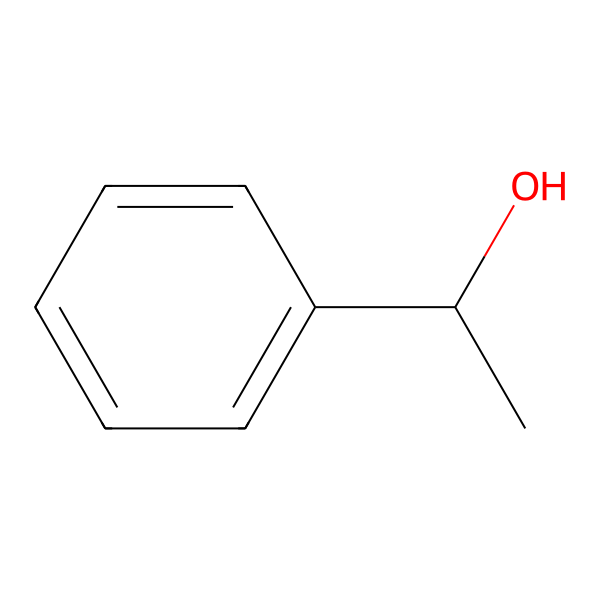

In [7]:
m2 = Chem.MolFromSmiles('CC(O)c1ccccc1')
rdkit.Chem.Draw.MolToImage(m2,size=(600,600))